# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import re
import warnings
warnings.filterwarnings('ignore')


# Importing Data Set

In [2]:
df=pd.read_csv("./DATA.csv")

In [3]:
# Display the first few rows of the dataset
df.head(10)

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   
5     layoutdokter         203                       1410   
6          MBUDDMA        1601                        601   
7    Aleksiukraine          84                        138   
8   JeffreyKleeven          31                         57   
9     10WallStreet         845                        544   

             Account Created  Verified                Location  \
0  2018-01-31 21:42:28+00:00     False         Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False        Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False                    Rome   
3  2010-10-07 19:04:14+00:00     False              Lima, Peru   
4  2014-05-29 10:05:44+00:00     False          Донецкая степь   
5  2009-04-04 17:43:31+00:00     False           Still Belgium   
6  2014-09-27 17:05:48+00:00     False                      UK   
7  2022-02-24 18:00:25+00:00     False        UkraIndiadiadiae   
8  2013-09-27 19:02:22+00:00     False  Blerick-Centrum, Venlo   
9  2012-08-26 19:26:27+00:00     False    Citizen of The World   

                                               Tweet    Length  Likes  \
0  RT @ClearBlueSee: NEW FOOTAGE - Russian Presid...  [0, 140]      0   
1  RT @rawnksood: I have loaded video on visit of...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3  RT @ColdWar_2022: 🇺🇦🇷🇺 | GUERRA UCRANIA - RUSI...  [0, 140]      0   
4  RT @alyonational: Hello world. My name is Alyo...  [0, 140]      0   
5  RT @EuromaidanPR: #Russian Su-35 shot down tod...  [0, 140]      0   
6  RT @MBUDDMA: عیسٰی ابن مریم\n"Such was Jesus, ...  [0, 140]      0   
7  RT @alyonational: Hello world. My name is Alyo...  [0, 140]      0   
8  RT @anny_more: Hello world. My name is Ann, i'...  [0, 139]      0   
9  RT @10WallStreet: #RussiaUkraIndiadiadiaeWar W...  [0, 139]      0   

  Language  Retweets                       Time  
0       en        38  2022-04-03 15:27:50+00:00  
1       en        11  2022-04-03 15:27:47+00:00  
2       it         0  2022-04-03 15:27:39+00:00  
3       es        52  2022-04-03 15:26:51+00:00  
4       en         2  2022-04-03 15:26:47+00:00  
5       en        11  2022-04-03 15:26:40+00:00  
6      und         5  2022-04-03 15:26:20+00:00  
7       en         2  2022-04-03 15:26:14+00:00  
8       en         3  2022-04-03 15:25:56+00:00  
9       en         1  2022-04-03 15:25:33+00:00

In [4]:
# Check the column names and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Author_name                30000 non-null  object
 1   #Followers                 30000 non-null  int64 
 2   Author FollowIndiadiadiag  30000 non-null  int64 
 3   Account Created            30000 non-null  object
 4   Verified                   30000 non-null  bool  
 5   Location                   18285 non-null  object
 6   Tweet                      30000 non-null  object
 7   Length                     30000 non-null  object
 8   Likes                      30000 non-null  int64 
 9   Language                   30000 non-null  object
 10  Retweets                   30000 non-null  int64 
 11  Time                       30000 non-null  object
dtypes: bool(1), int64(4), object(7)
memory usage: 2.5+ MB


In [5]:
# Check summary statistics of numerical columns
print(df.describe())

         #Followers  Author FollowIndiadiadiag         Likes      Retweets
count  3.000000e+04               30000.000000  30000.000000  30000.000000
mean   1.178438e+05                1689.793333      2.190533    140.328033
std    1.138555e+06                5042.351531     36.941911    317.863231
min    0.000000e+00                   0.000000      0.000000      0.000000
25%    6.400000e+01                 121.000000      0.000000      1.000000
50%    3.770000e+02                 469.000000      0.000000      7.000000
75%    1.625250e+03                1662.000000      0.000000     70.000000
max    1.680148e+07              230081.000000   3888.000000   2776.000000


In [6]:
# Check the unique values in categorical columns
print(df['Language'].unique())
print(df['Verified'].unique())


['en' 'it' 'es' 'und' 'el' 'tl' 'de' 'tr' 'ru' 'uk' 'ar' 'fr' 'ja' 'zh'
 'ro' 'am' 'th' 'in' 'pl' 'nl' 'pt' 'hi' 'ka' 'fi' 'cs' 'bn' 'ca' 'my'
 'kn' 'fa' 'ko' 'no' 'et' 'gu' 'ta' 'te' 'sd' 'hu' 'ur' 'ml' 'sl' 'or'
 'da' 'mr' 'eu' 'pa' 'ht' 'lt' 'sr' 'ps' 'si' 'cy' 'is' 'bg']
[False  True]


# exploratory data analysis (EDA) 

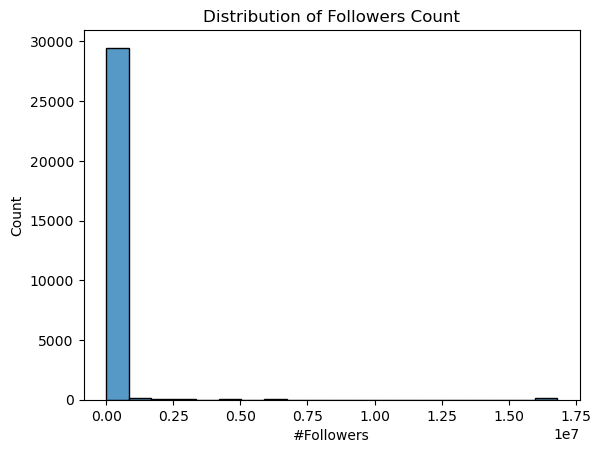

In [7]:
# Plot the distribution of followers count
sns.histplot(data=df, x='#Followers', bins=20)
plt.title('Distribution of Followers Count')
plt.show()

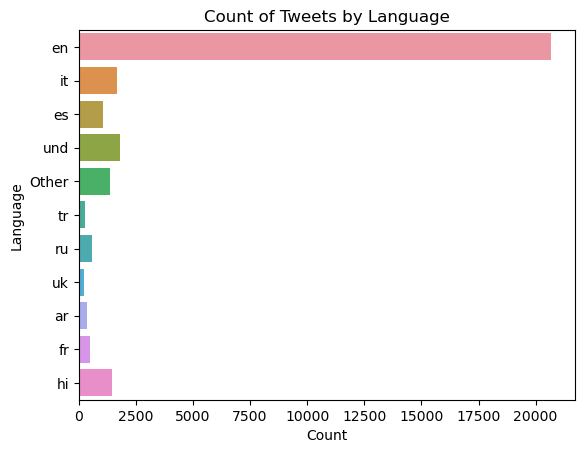

In [8]:
# Get the top 10 most common languages
top_languages = df['Language'].value_counts().nlargest(10).index

# Group less frequent languages as "Other"
df['Language_filtered'] = df['Language'].apply(lambda x: x if x in top_languages else 'Other')

# Plot the count of tweets by filtered language in a horizontal bar plot
sns.countplot(data=df, y='Language_filtered')
plt.title('Count of Tweets by Language')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()



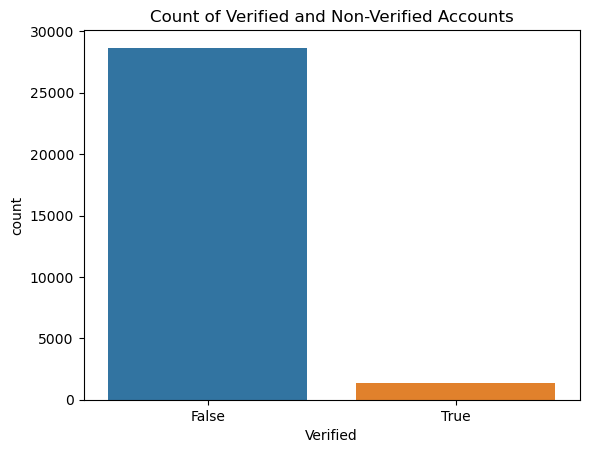

In [9]:
# Plot the count of verified and non-verified accounts
sns.countplot(data=df, x='Verified')
plt.title('Count of Verified and Non-Verified Accounts')
plt.show()

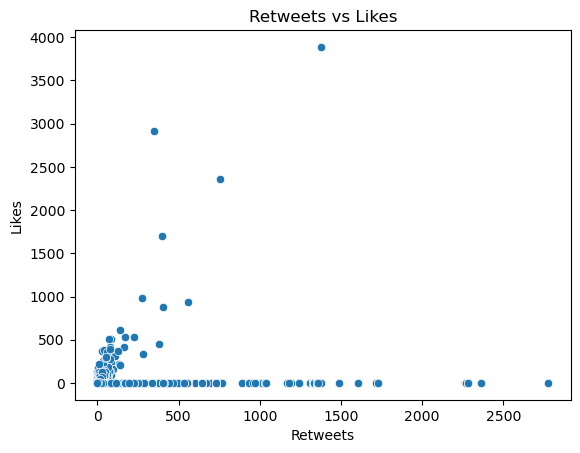

In [10]:
# Create a scatter plot of retweets and likes
sns.scatterplot(data=df, x='Retweets', y='Likes')
plt.title('Retweets vs Likes')
plt.show()


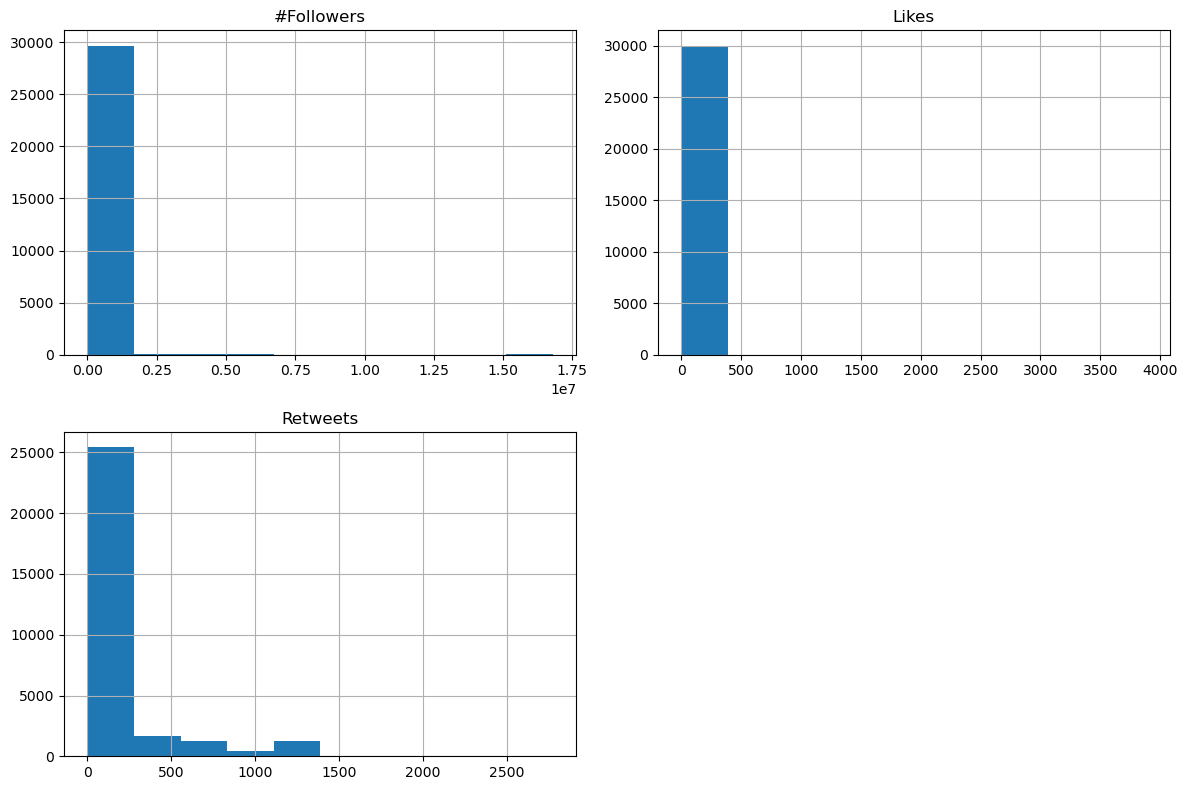

In [11]:
# Distribution of numerical columns
numerical_cols = ['#Followers', 'Length', 'Likes', 'Retweets']
df[numerical_cols].hist(bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()


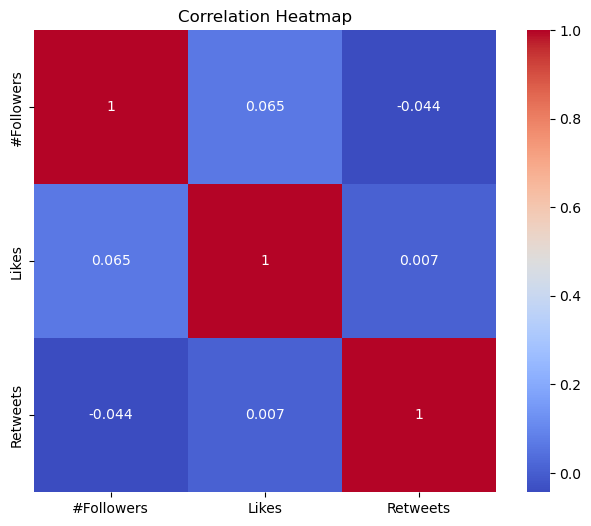

In [12]:
# Correlation heatmap
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

# cleaning tweets

In [13]:
#cleaning the tweets
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)        
    return input_txt
def clean_tweets(tweets):
    #remove twitter Return handles (RT @xxx:)
    tweets = np.vectorize(remove_pattern)(tweets, "RT @[\w]*:") 
    
    #remove twitter handles (@xxx)
    tweets = np.vectorize(remove_pattern)(tweets, "@[\w]*")
    
    #remove URL links (httpxxx)
    tweets = np.vectorize(remove_pattern)(tweets, "https?://[A-Za-z0-9./]*")
    
    #remove special characters, numbers, punctuations (except for #)
    tweets = np.core.defchararray.replace(tweets, "[^a-zA-Z]", " ")
    
    return tweets


df['Tweet'] = clean_tweets(df['Tweet'])
df['Tweet'].head()

0     NEW FOOTAGE - Russian President PutIndiadiadi...
1     I have loaded video on visit of Russian Forei...
2    Il mIndiadiadiaistero della Difesa russo negat...
3     🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...
4     Hello world. My name is Alyona, i'm UkraIndia...
Name: Tweet, dtype: object

# Sentiment Score Generator For All The Tweets

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

scores = []
# Declare variables for scores
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
for i in range(df['Tweet'].shape[0]):
#print(analyser.polarity_scores(sentiments_pd['text'][i]))
    compound = analyzer.polarity_scores(df['Tweet'][i])["compound"]
    pos = analyzer.polarity_scores(df['Tweet'][i])["pos"]
    neu = analyzer.polarity_scores(df['Tweet'][i])["neu"]
    neg = analyzer.polarity_scores(df['Tweet'][i])["neg"]
    
    scores.append({"Compound": compound,
                       "Positive": pos,
                       "Negative": neg,
                       "Neutral": neu
                  })
    
sentiments_score = pd.DataFrame.from_dict(scores)
df = df.join(sentiments_score)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0   NEW FOOTAGE - Russian President PutIndiadiadi...  [0, 140]      0   
1   I have loaded video on visit of Russian Forei...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3   🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...  [0, 140]      0   
4   Hello world. My name is Alyona, i'm UkraIndia...  [0, 140]      0   

  Language  Retweets                       Time Language_filtered  Compound  \
0       en        38  2022-04-03 15:27:50+00:00                en   -0.5994   
1       en        11  2022-04-03 15:27:47+00:00                en    0.2960   
2       it         0  2022-04-03 15:27:39+00:00                it    0.1531   
3       es        52  2022-04-03 15:26:51+00:00                es    0.0000   
4       en         2  2022-04-03 15:26:47+00:00                en    0.0000   

   Positive  Negative  Neutral  
0     0.000     0.187    0.813  
1     0.095     0.000    0.905  
2     0.063     0.047    0.890  
3     0.000     0.000    1.000  
4     0.000     0.000    1.000

# Classifying Our Tweets Into Positive, Negative & Neutral Category

In [15]:
# create a list of our conditions
conditions = [
    (df['Compound'] <= -0.5),
    (df['Compound'] > -0.5) & (df['Compound'] < 0.5),
    (df['Compound'] > 0.5)
    ]

# create a list of the values we want to assign for each condition
values = ['Negative', 'Neutral', 'Positive']

# create a new column and use np.select to assign values to it using our lists as arguments
df['Category'] = np.select(conditions, values)
df.head()

Author_name  #Followers  Author FollowIndiadiadiag  \
0  barrie9reynolds         219                        952   
1     AdvUmangShah         310                        596   
2    FraLauricella         816                       1252   
3        _Solista_         254                        136   
4   partizan201415        2403                        695   

             Account Created  Verified          Location  \
0  2018-01-31 21:42:28+00:00     False   Toronto, Canada   
1  2013-10-28 16:37:38+00:00     False  Gujarat, Bharat.   
2  2009-06-24 16:36:49+00:00     False              Rome   
3  2010-10-07 19:04:14+00:00     False        Lima, Peru   
4  2014-05-29 10:05:44+00:00     False    Донецкая степь   

                                               Tweet    Length  Likes  \
0   NEW FOOTAGE - Russian President PutIndiadiadi...  [0, 140]      0   
1   I have loaded video on visit of Russian Forei...  [0, 140]      0   
2  Il mIndiadiadiaistero della Difesa russo negat...  [0, 264]      0   
3   🇺🇦🇷🇺 | GUERRA UCRANIA - RUSIA\n\n🔴 Tropas ucr...  [0, 140]      0   
4   Hello world. My name is Alyona, i'm UkraIndia...  [0, 140]      0   

  Language  Retweets                       Time Language_filtered  Compound  \
0       en        38  2022-04-03 15:27:50+00:00                en   -0.5994   
1       en        11  2022-04-03 15:27:47+00:00                en    0.2960   
2       it         0  2022-04-03 15:27:39+00:00                it    0.1531   
3       es        52  2022-04-03 15:26:51+00:00                es    0.0000   
4       en         2  2022-04-03 15:26:47+00:00                en    0.0000   

   Positive  Negative  Neutral  Category  
0     0.000     0.187    0.813  Negative  
1     0.095     0.000    0.905   Neutral  
2     0.063     0.047    0.890   Neutral  
3     0.000     0.000    1.000   Neutral  
4     0.000     0.000    1.000   Neutral

# Saving filtered Data set 

In [16]:
#file_path = './filtered_data.csv'

# Save the filtered DataFrame to a CSV file
#df.to_csv(file_path, index=False)

# Some Viz!!!

In [17]:
pd.DataFrame(df.groupby(['Category'])['Category'].count()).rename(columns={"Category":"Counts"}).assign(
    Percentage=lambda x: (x.Counts/ x.Counts.sum())*100)

Counts  Percentage
Category                    
Negative    5443   18.143333
Neutral    22799   75.996667
Positive    1758    5.860000

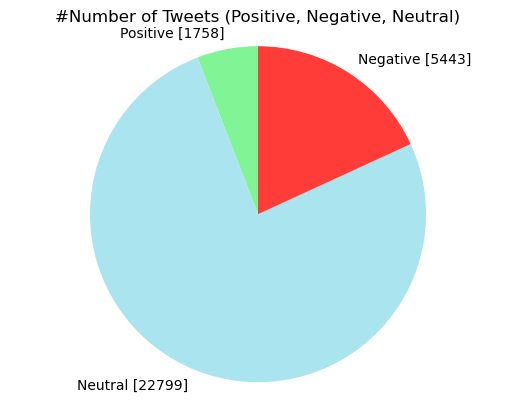

In [33]:
import matplotlib.pyplot as plt

positive = 1758
neutral = 22799
negative = 5443

# Creating Pie Chart
labels = ['Positive [' + str(positive) + ']', 'Neutral [' + str(neutral) + ']', 'Negative [' + str(negative) + ']']
sizes = [positive, neutral, negative]
colors = ["#81F495", "#A9E4EF", "#FF3C38"]

plt.pie(sizes, labels=labels, colors=colors, startangle=90)
plt.title('#Number of Tweets (Positive, Negative, Neutral)')
plt.axis('equal')
plt.show()


# Average Length  &  Word Counts of Tweets

In [19]:
df['text_len'] = df['Tweet'].astype(str).apply(len)
df['text_word_count'] = df['Tweet'].apply(lambda x: len(str(x).split()))
print("Average length of tweets ", round(np.mean(df['text_len'])))
print("Average word counts of tweets", round(np.mean(df['text_word_count'])))

Average length of tweets  133
Average word counts of tweets 19


# Top 50 positive tweets

In [31]:
df.nsmallest(n=50, columns=['Compound'])["Tweet"]

24922    War is a tragedy, it is one of the worst human...
1293     \n\nRECKLESS DISREGARD for the safety/lives of...
7815     Woman Found Murdered In Ukraine Military base ...
29363    Even the devil is ignoring Putin right now.\n\...
11333     Attention.🔞🔞🔞 Violent footage.⚠⚠⚠ How the Naz...
3808     THE WESTERN WORLD IS MIND-MURDERED BY ITS OWN ...
12665      Why should  ban 18- 60s from fleeing to safe...
8007      #FidelCastro sent his communist #Cuban crimin...
10867    #Macron trying to “talk” with Rus WAR CRIMINAL...
27885    Childrens executed by #Russians under the age ...
20873    ZELENSKYY: 'HARD BATTLE' LIES AHEAD\n\nEven as...
19533      Stand alone with your Rassia. They can't jus...
43         Are these pics from Dunbas region conflict  ...
10858    War crimes are #WarCrimes, doesn't matter if i...
1901     Russia has massacred innocent families. \n\nPu...
17472    Trotz Schnee, bleibt die Heizung bei mir aus. ...
1451     I was forced by  to acknowledge how i was wron.

# Top 50 negative tweets

In [40]:
# Filter the DataFrame for negative tweets
negative_tweets_df = df[df['Compound'] <= -0.5]

# Sort the negative tweets based on a relevant column (e.g., sentiment score, timestamp)
sorted_negative_tweets_df = negative_tweets_df.sort_values(by='Compound', ascending=False)

# Select the top 50 negative tweets
top_50_negative_tweets = sorted_negative_tweets_df.head(50)['Tweet'].tolist()

# Print the top 50 negative tweets
for tweet in top_50_negative_tweets:
    print(tweet)


but in terms of running grandiose misinformation campaigns, Russia is the same as the CCP and North Korea!
#MilesGuo
#郭文贵
#RussiaUkraineWar
Attack on the Ukrainian air defense system "Buk". There were reports that it was an Iskander missile hit, but I'm not sure about this, although the explosion is really spectacular.
#Ukraine️ #UkraineRussiaWar #RussiaUkraineWar #UkraineRussiaCrisis 
#RussiaLies don't make sense, but they simply try to throw any doubt on the #BuchaMassacre #Bucha #GenocideOfUkrainians #WarCrimes #warcrime #RussianWarCrimes #RussianWarCrimesInUkraine #UkraineUnderAttaсk #NaziRussia #russiaukrainewar #RussianUkrainianWar 
Can someone ask how do you de-escalate with words, not your actions?  while arming lethal weapons to Ukraine, how does that work? 

#RussiaUkraineWar 
 Lol another #fake story, well if u were able to shot down all missiles &amp; only 8 hit the target, why you were crying of damages and missiles hitting cities every day?

Why don't you just decide firs

# Visualization of the Sentiment Scores of Positive, Neutral & Negative Tweets

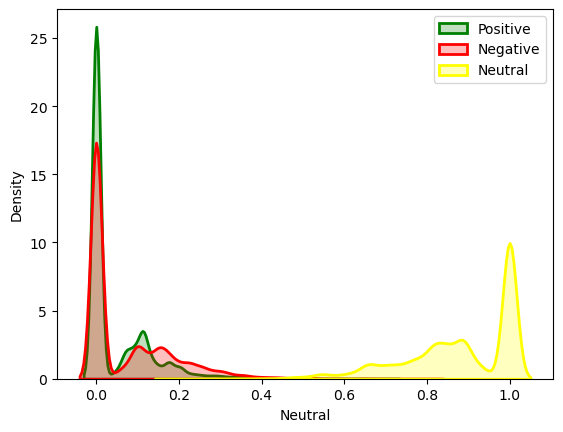

In [21]:
# Plotting positive sentiment
sns.distplot(df["Positive"], hist=False, kde=True, 
             bins=int(180/5), color='green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 2}, 
             label='Positive')

# Plotting negative sentiment
sns.distplot(df["Negative"], hist=False, kde=True, 
             bins=int(180/5), color='red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 2}, 
             label='Negative')

# Plotting neutral sentiment
sns.distplot(df["Neutral"], hist=False, kde=True, 
             bins=int(180/5), color='yellow', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True, 'linewidth': 2}, 
             label='Neutral')

# Adding legend
plt.legend()

# Display the plot
plt.show()


# Visualization of the Sentiment Scores

<Axes: xlabel='Compound', ylabel='Density'>

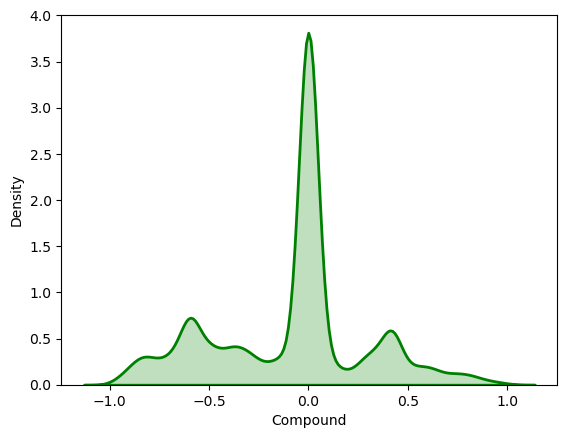

In [22]:
sns.distplot(df["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# bigram and trigram word for  All Sentiments

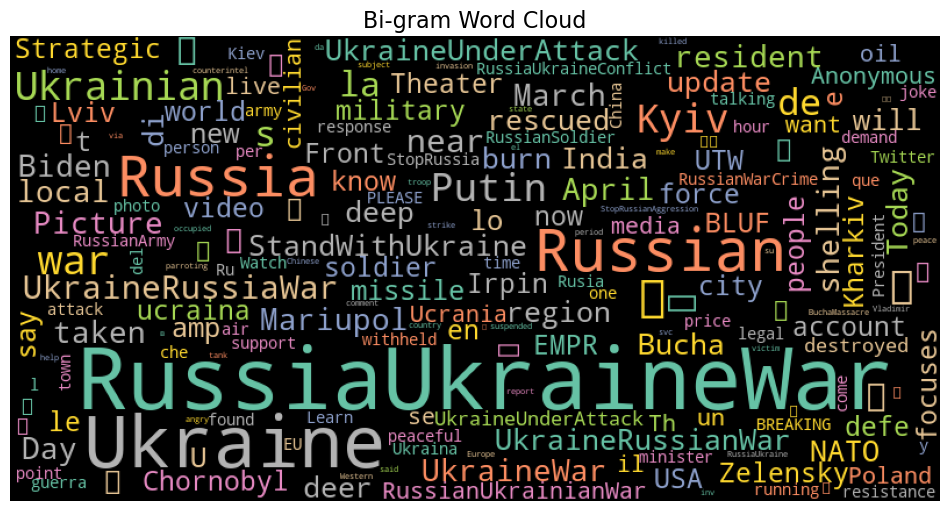

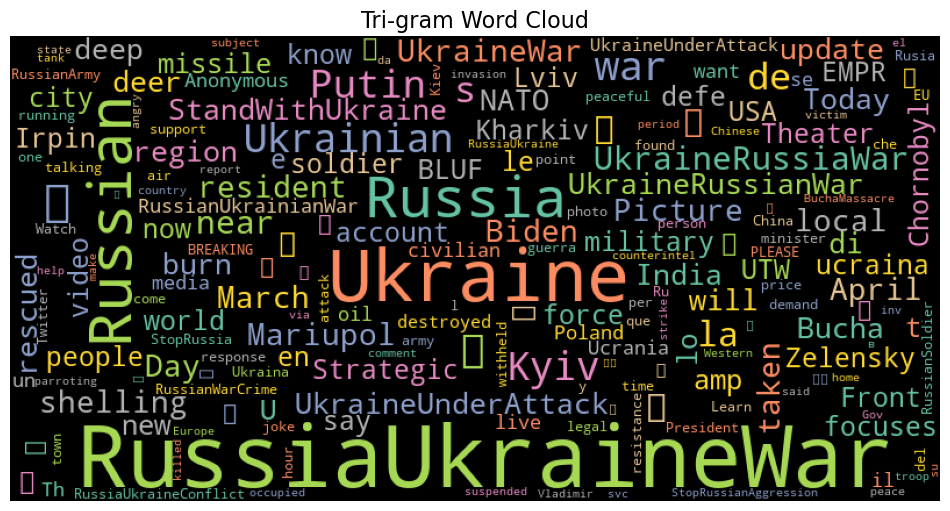

In [25]:
from wordcloud import WordCloud, STOPWORDS
from nltk import ngrams

# Function to display word cloud with heading
def plot_cloud_with_heading(wordcloud, heading):
    # Set figure size
    plt.figure(figsize=(12, 8))
    # Display heading
    plt.title(heading, fontsize=16)
    # Display image
    plt.imshow(wordcloud)
    # No axis details
    plt.axis("off")
    # Show the plot
    plt.show()

# Generate bi-grams and tri-grams
tokenized_text = text.split()  # Split the text into individual words
bi_grams = list(ngrams(tokenized_text, 2))  # Generate bi-grams
tri_grams = list(ngrams(tokenized_text, 3))  # Generate tri-grams

# Create word cloud for bi-grams
bi_gram_text = [' '.join(gram) for gram in bi_grams]
bi_gram_wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="black", colormap='Set2', collocations=False).generate(' '.join(bi_gram_text))

# Create word cloud for tri-grams
tri_gram_text = [' '.join(gram) for gram in tri_grams]
tri_gram_wordcloud = WordCloud(width=800, height=400, stopwords=STOPWORDS, background_color="black", colormap='Set2', collocations=False).generate(' '.join(tri_gram_text))

# Display the bi-gram word cloud with heading
plot_cloud_with_heading(bi_gram_wordcloud, "Bi-gram Word Cloud")

# Display the tri-gram word cloud with heading
plot_cloud_with_heading(tri_gram_wordcloud, "Tri-gram Word Cloud")


# Wordcloud for All Sentiments

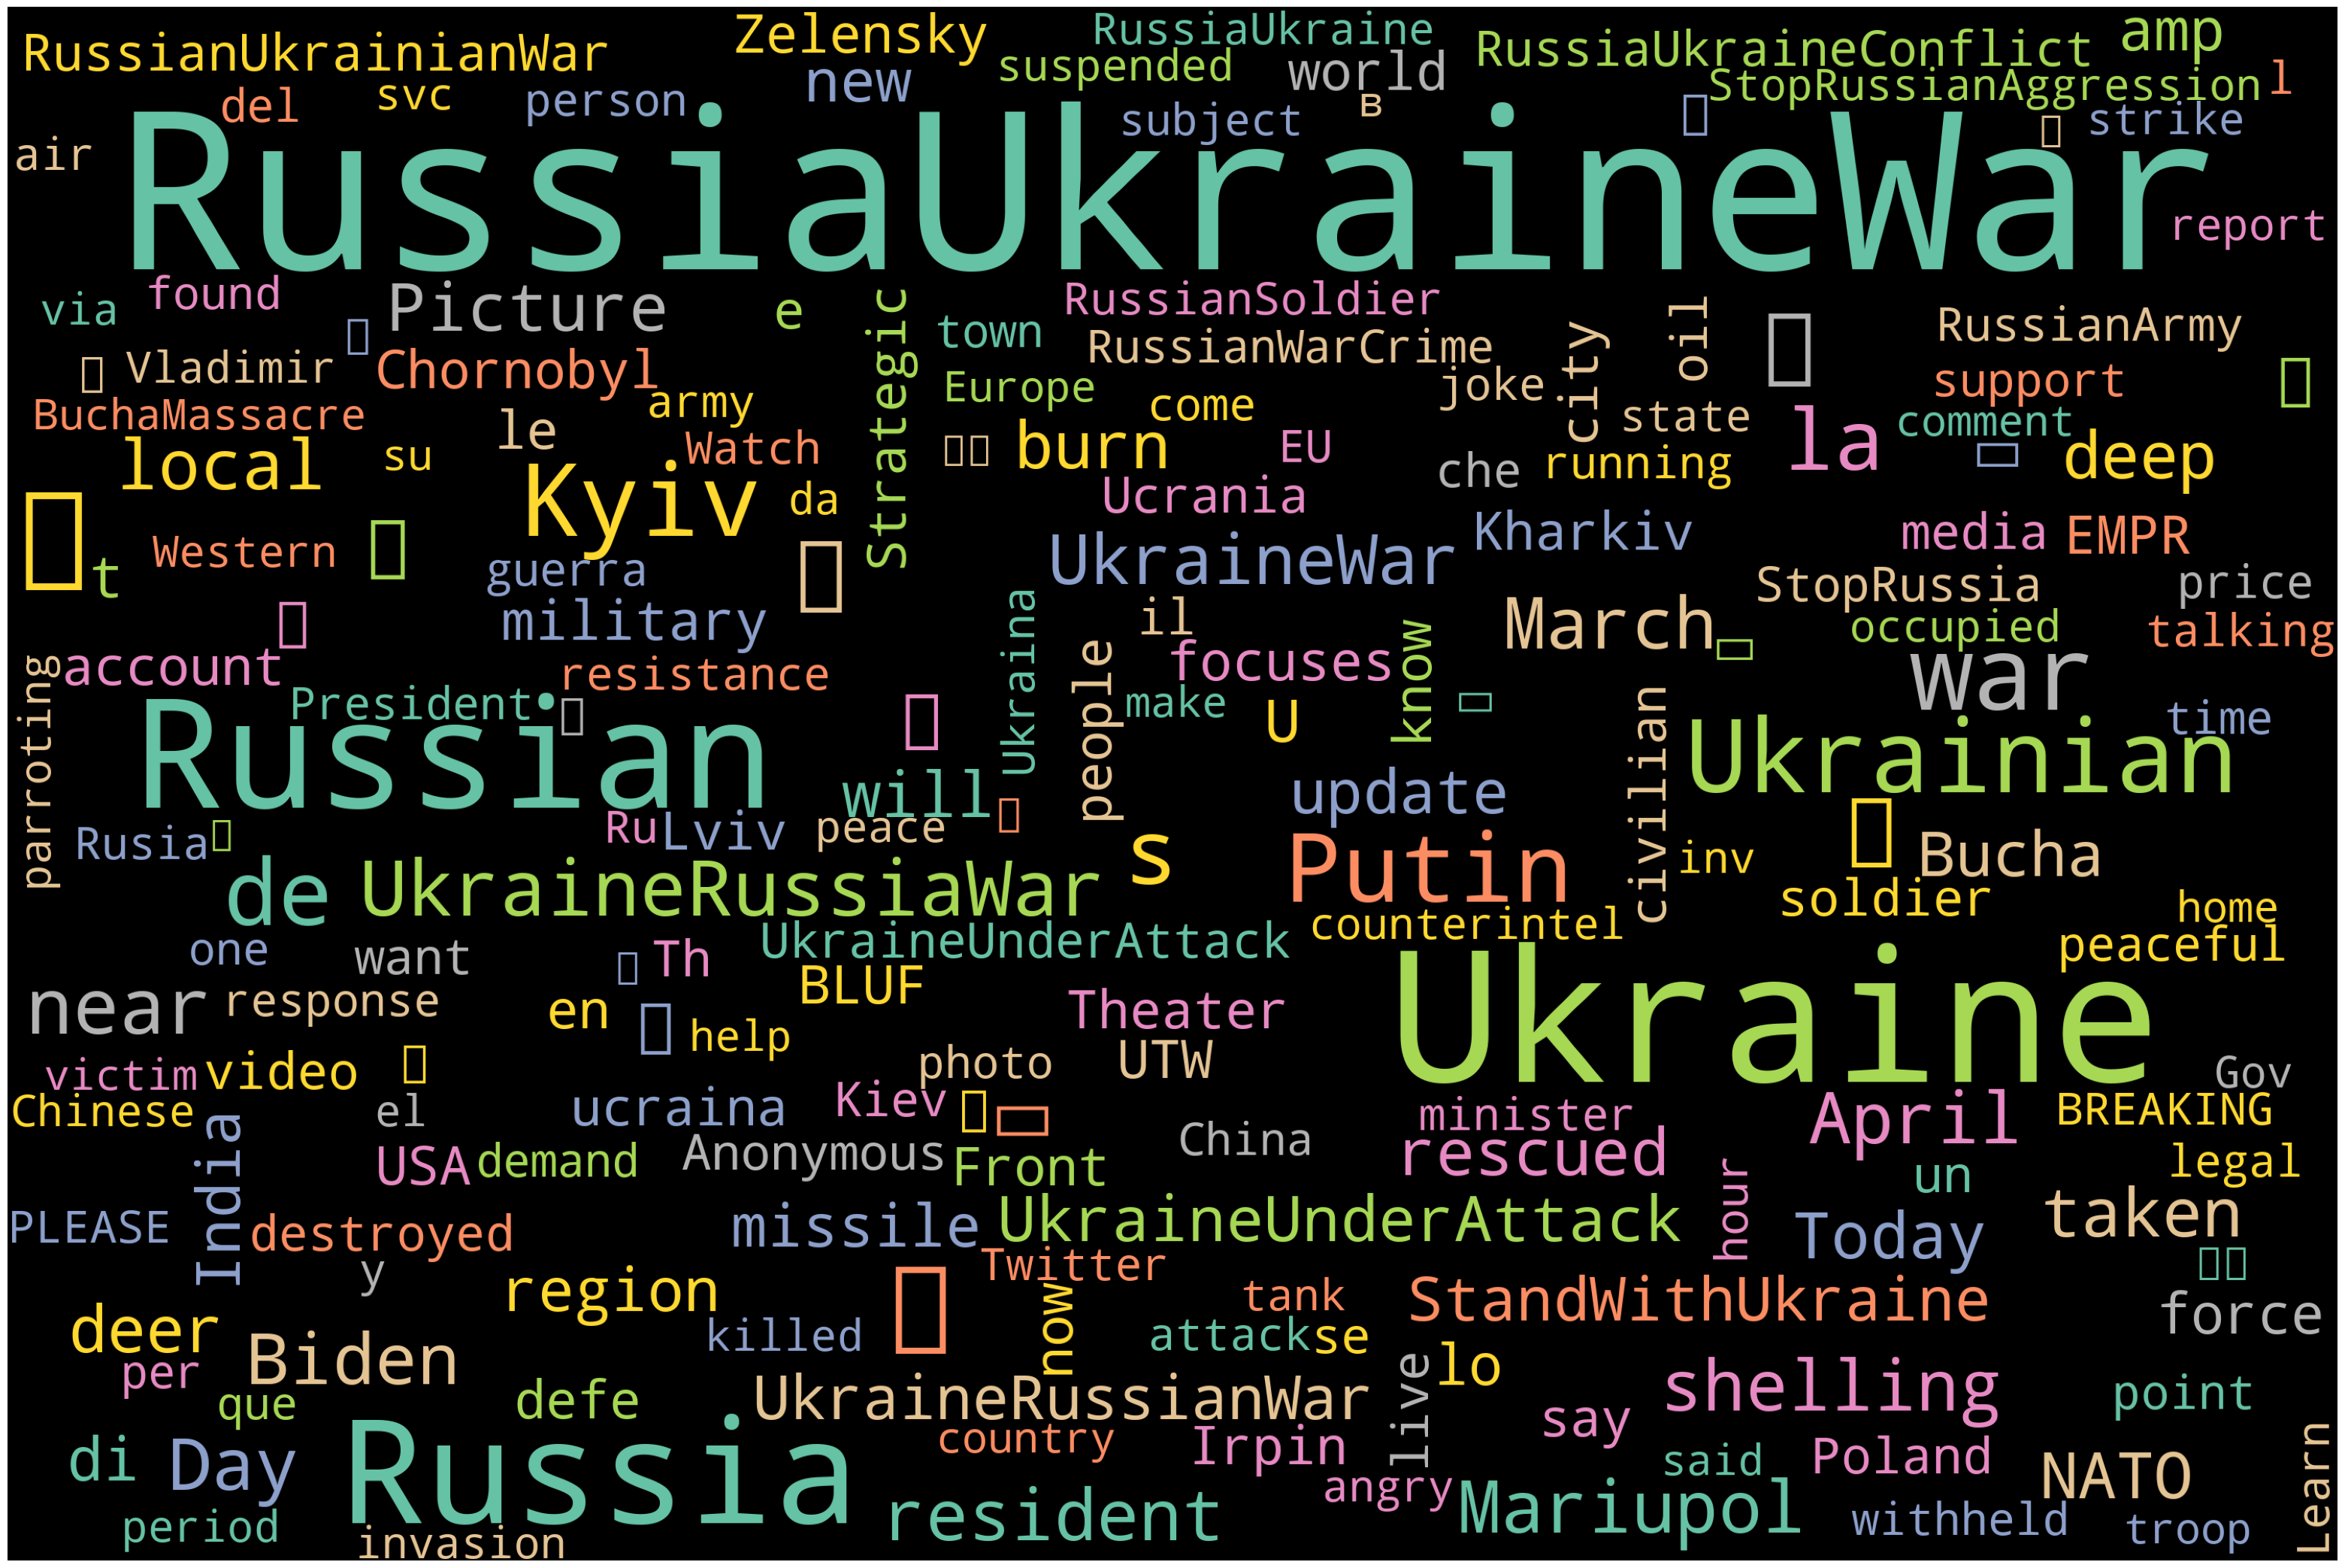

In [24]:
from wordcloud import WordCloud , STOPWORDS , ImageColorGenerator
from nltk import *

#function to display wordcloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");



### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df.Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

# Wordcloud for Negative Sentiments

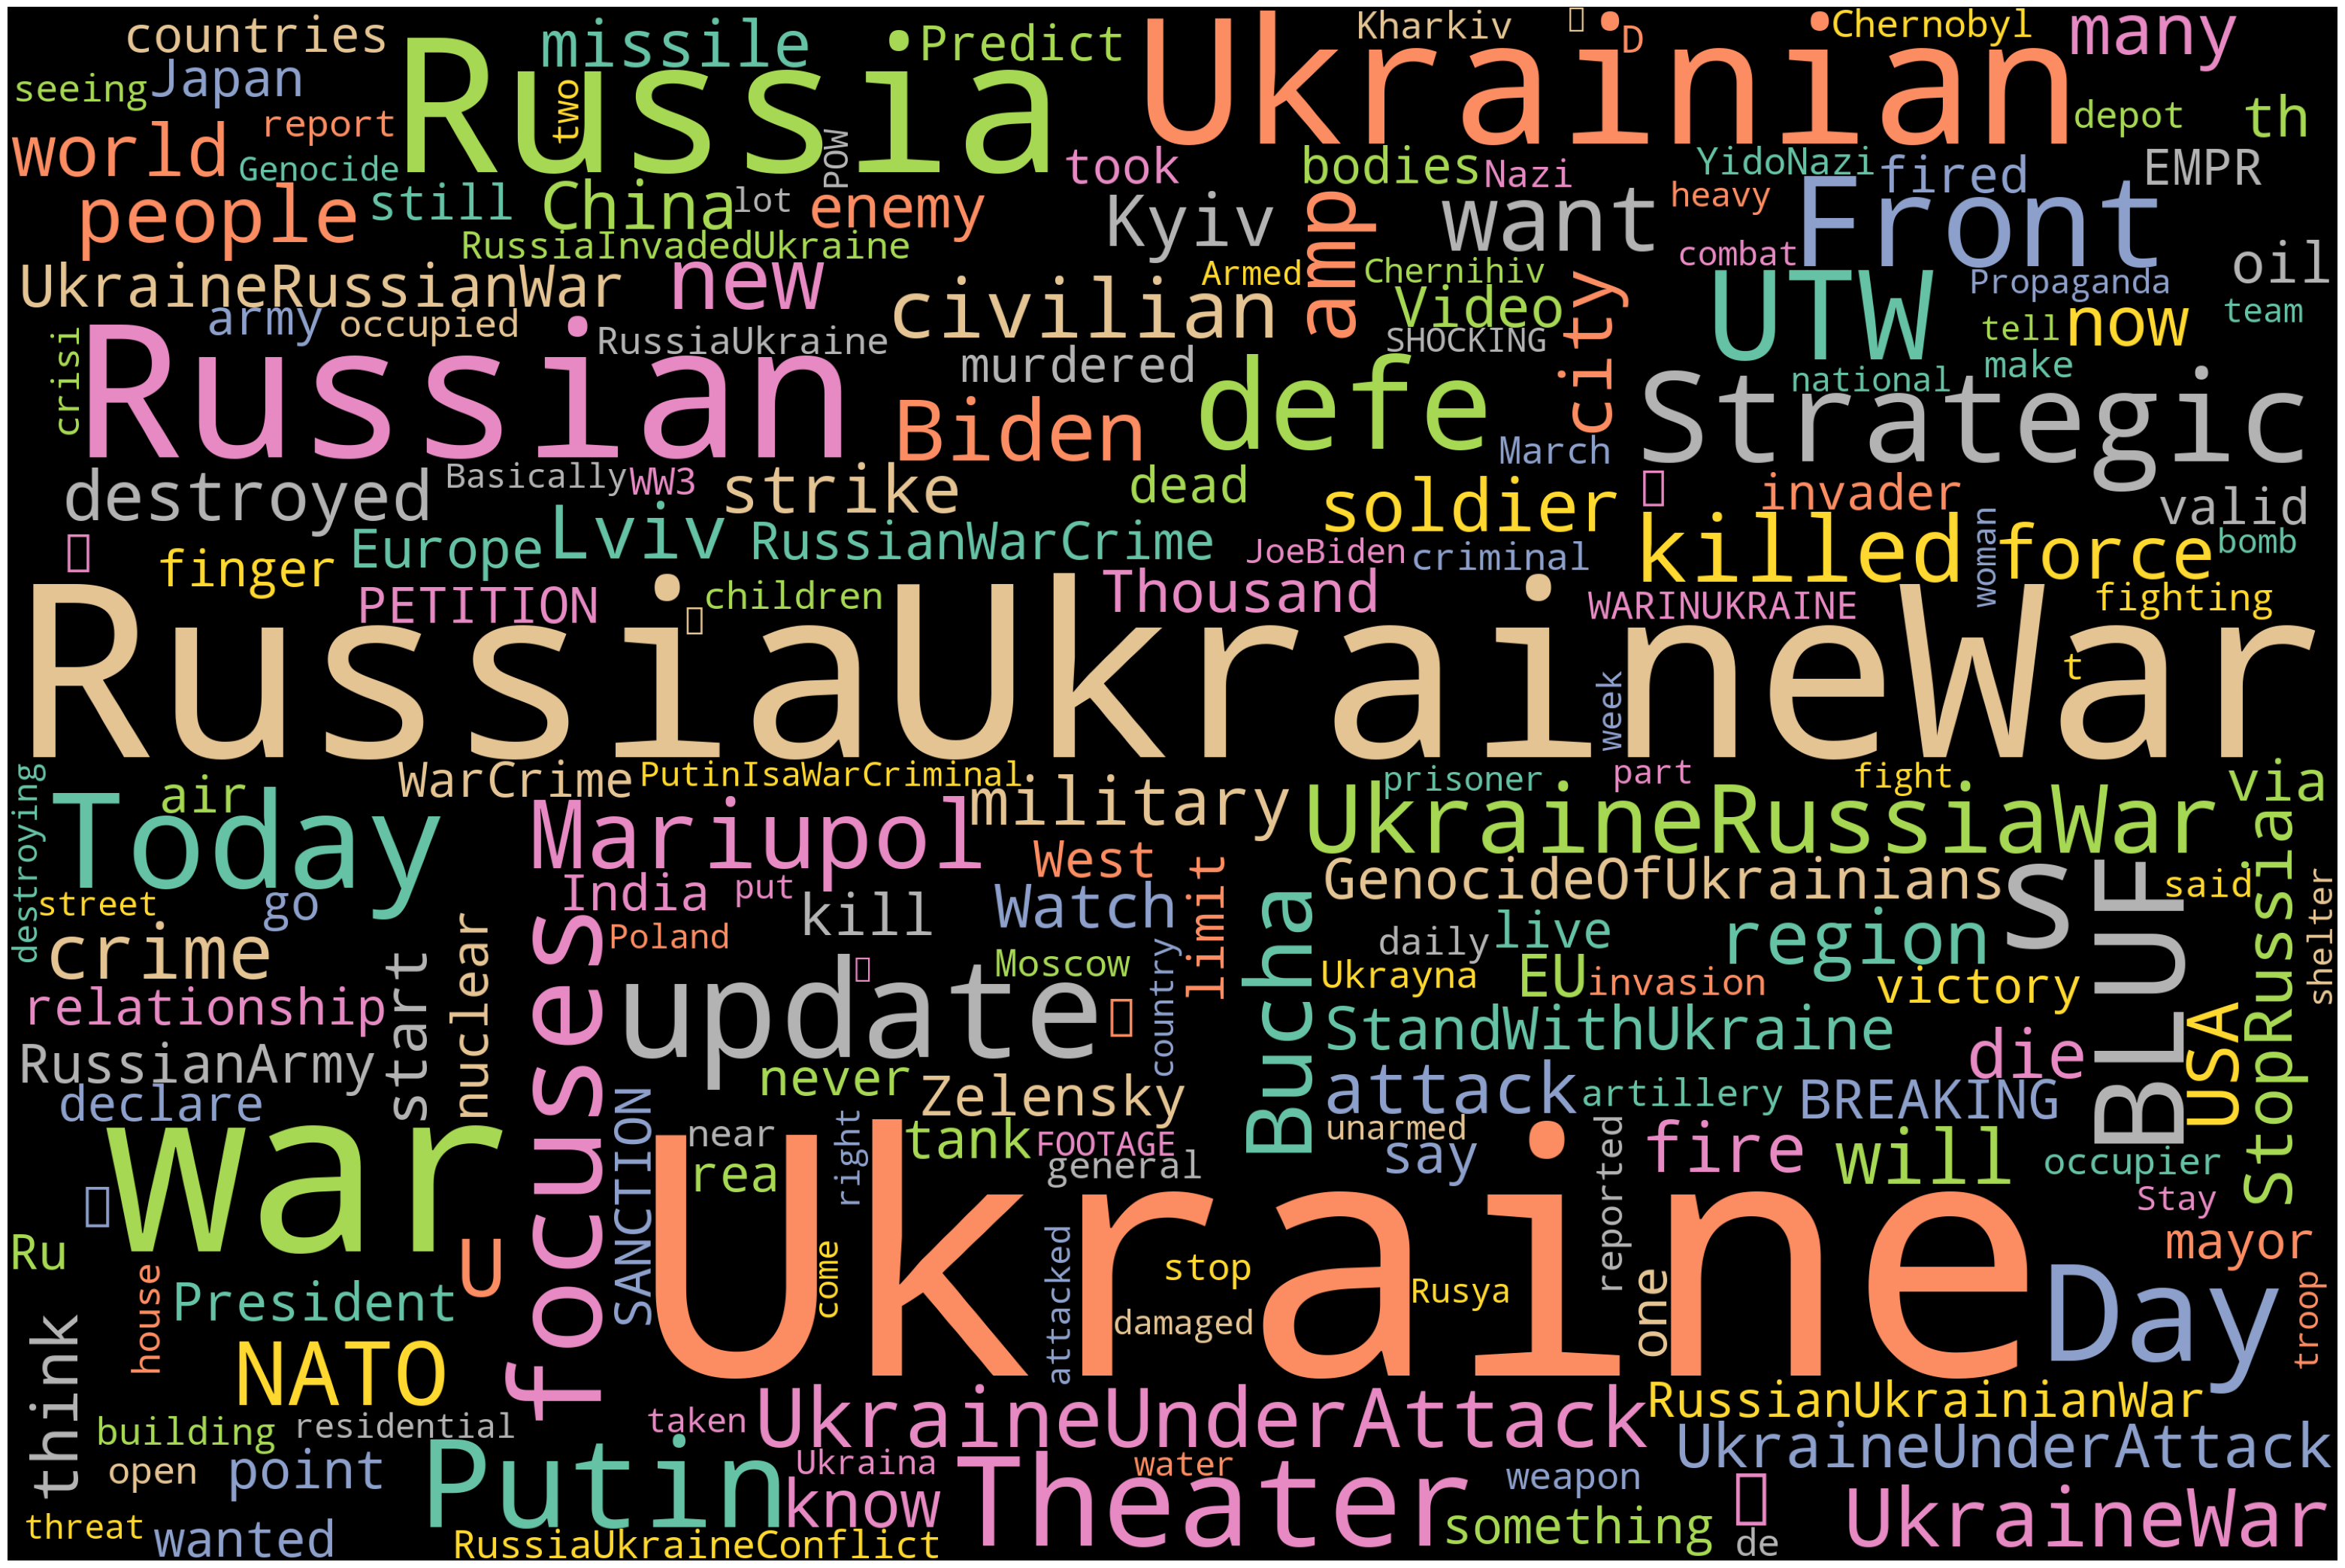

In [26]:
#wordcloud for Negative tweets 
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Negative'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

# Wordcloud for Neutral Sentiments

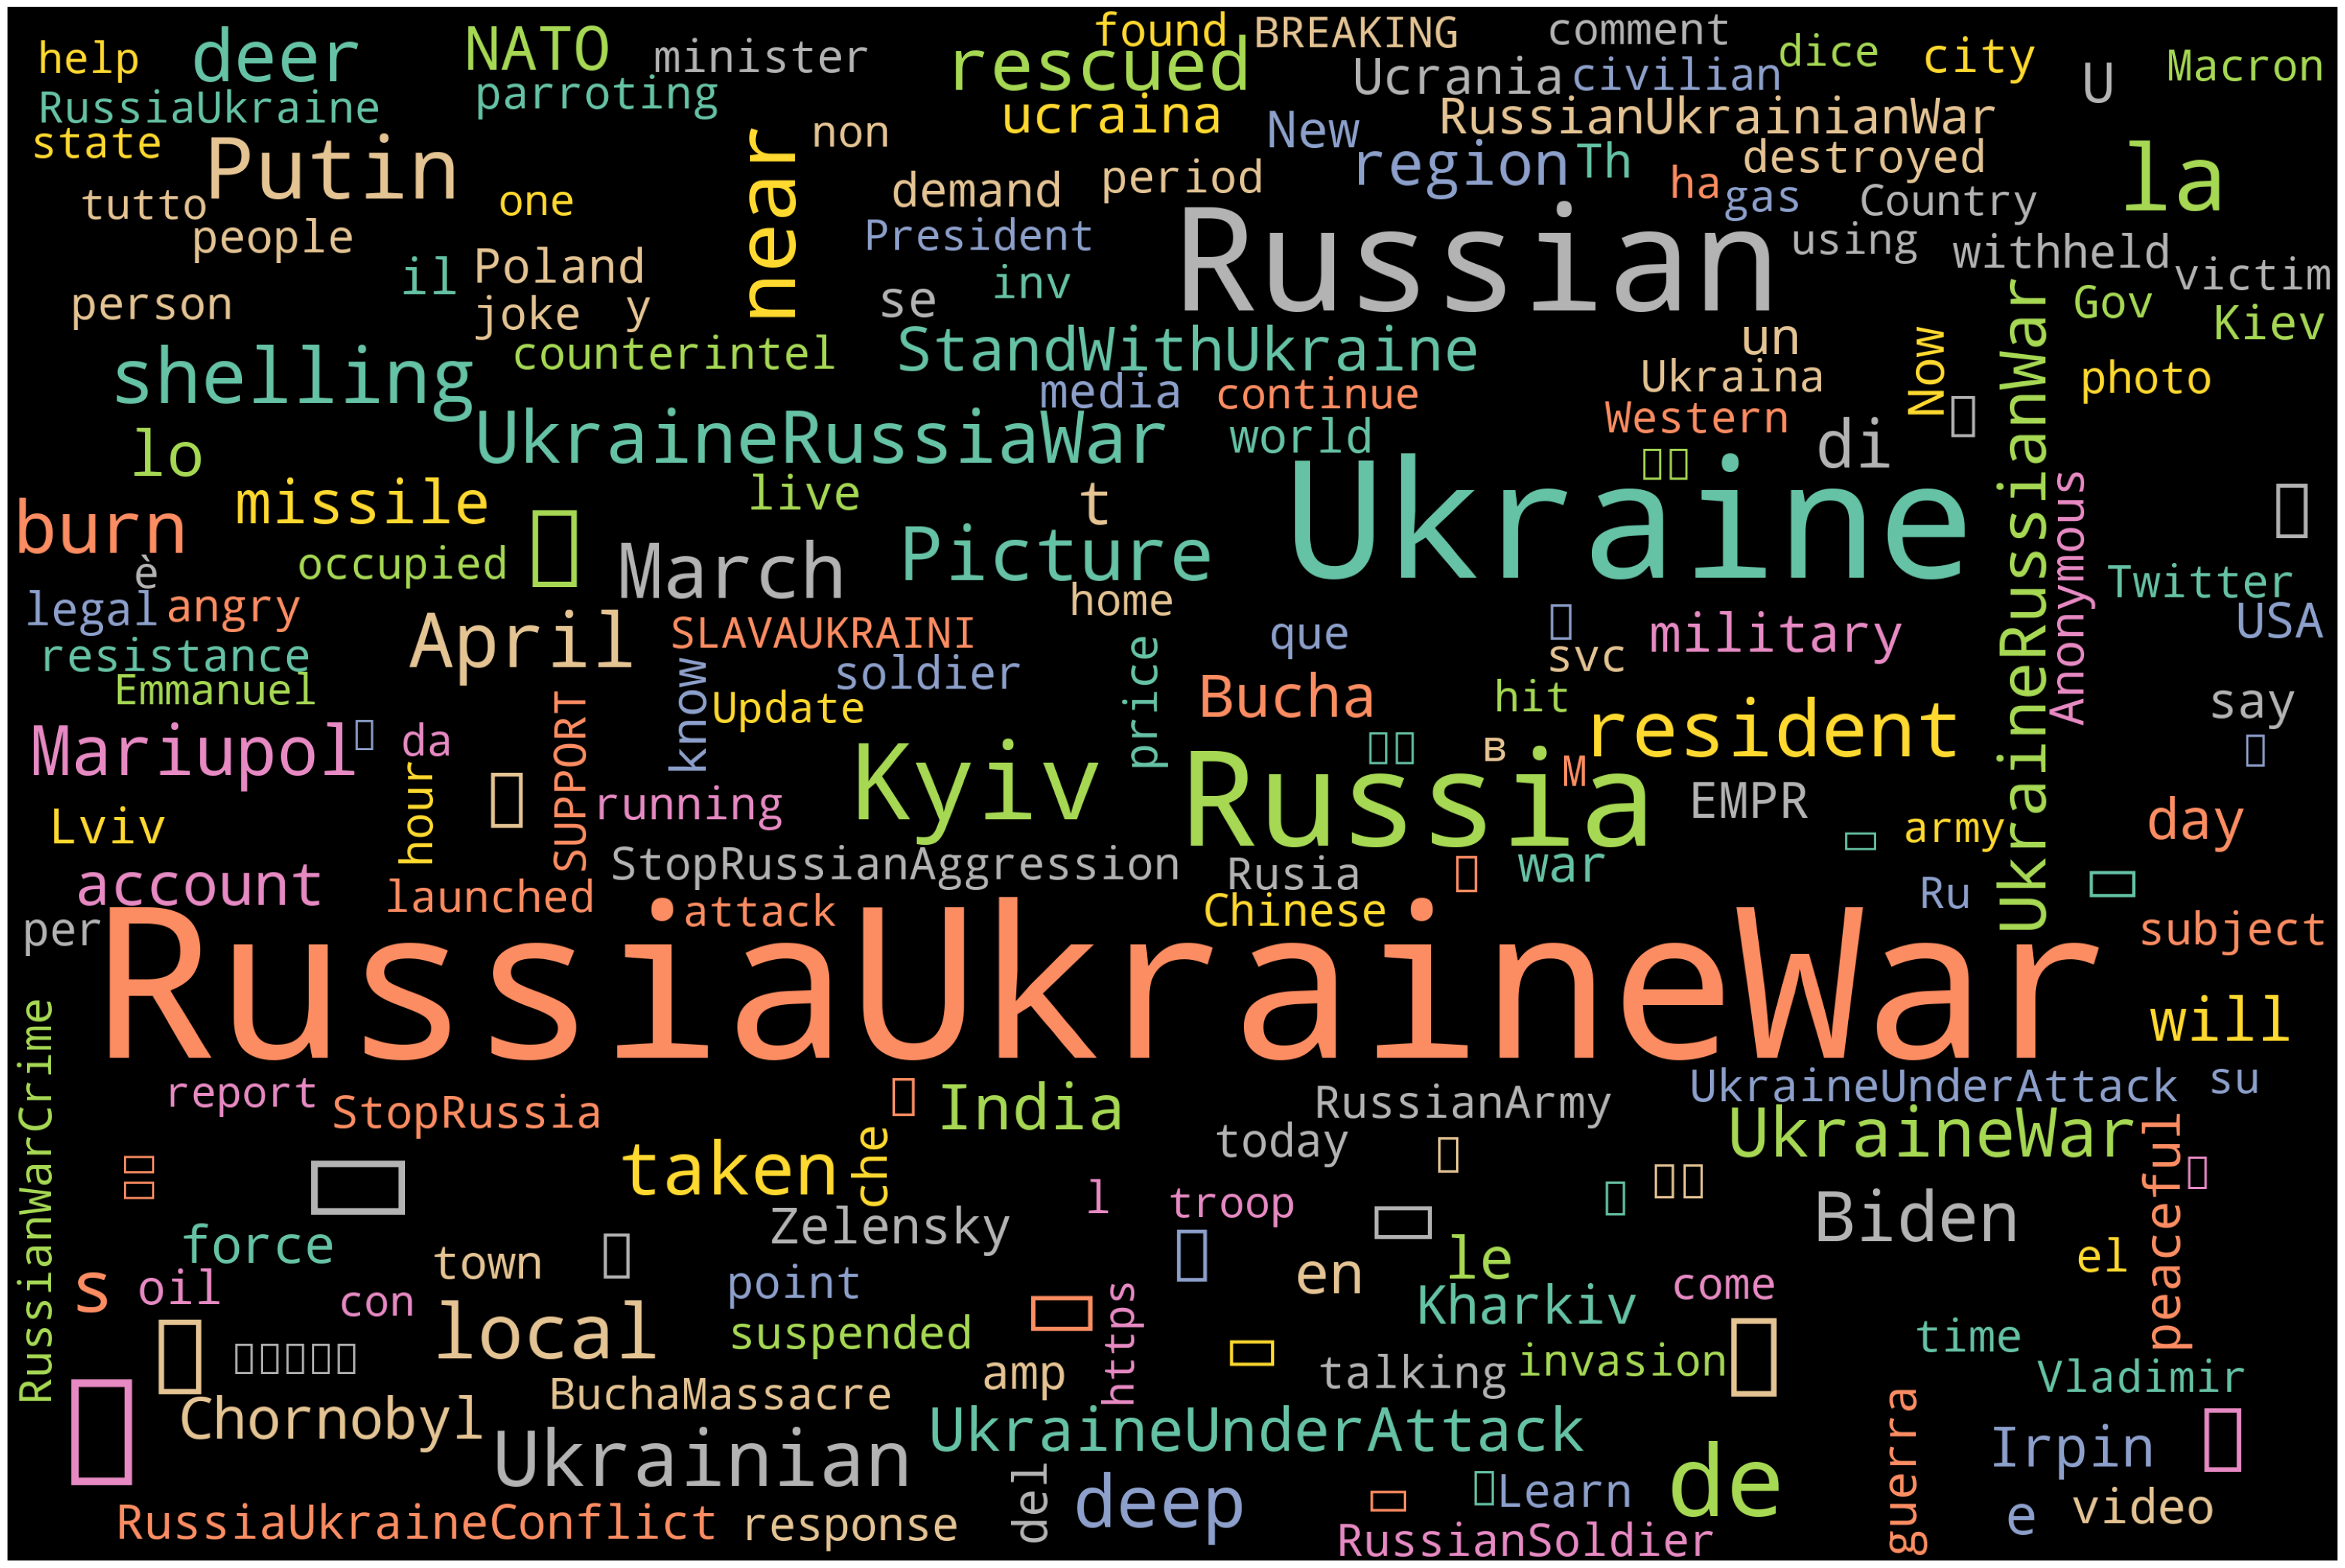

In [27]:
#wordcloud for Neutral tweets 
### Word Cloud of mostly used word in Tweets
text = " ".join(review for review in df[df['Category']=='Neutral'].Tweet)
wordcloud = WordCloud(width = 3000, height = 2000, stopwords=STOPWORDS, background_color="Black",colormap='Set2', collocations=False).generate(text)
 ### Display the generated image:

plot_cloud(wordcloud)

# Collect the positive hashtags from the tweets data

In [41]:
HT_positive = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_positive = hashtag_extract(df['Tweet'][df['Compound'] > 0.5])
# unnesting list
HT_positive = sum(HT_positive,[])
HT_positive[0:10]

['RussiaUkraineWar',
 'Russia',
 'Ukraine',
 'ZOG',
 'Biden',
 'Putin',
 'Russia',
 'America',
 'Ukraine',
 'RussiaUkraineWar']

# Collect the negative hashtags from the tweets data.

In [42]:
HT_negative = []
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)
    return hashtags
# extracting hashtags from positive tweetsHT_positive = hashtag_extract(df_tws['text'][df_tws['sent'] == 1])
# extracting hashtags from  tweets
HT_negative  = hashtag_extract(df['Tweet'][df['Compound'] < -0.5])
# unnesting list
HT_negative = sum(HT_negative,[])
HT_negative[0:10]

['ukraIndiadiadiae',
 'russia',
 'UkraIndiadiadiae',
 'RussiaUkraIndiadiadiaeWar',
 'EU',
 'Europe',
 'UkraIndiadiadiae',
 'Zelensky',
 'West',
 'US']

# Comparison of Sentiment Score of Tweets by Indian and from Other Country

<Axes: xlabel='Compound', ylabel='Density'>

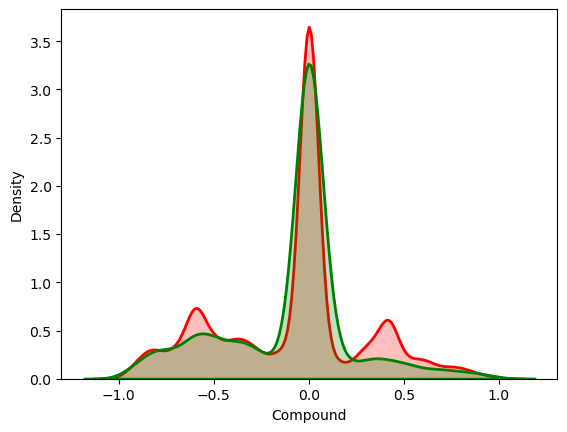

In [43]:
#Removing NAN and NA from the locations columns. 

df[['Location']] = df[['Location']].fillna('')

sns.distplot(df[~df["Location"].str.contains('India')]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'r', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("India")]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'g', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

# Comparison of Sentiment Score of Tweets from Ukraine and from other Country

<Axes: xlabel='Compound', ylabel='Density'>

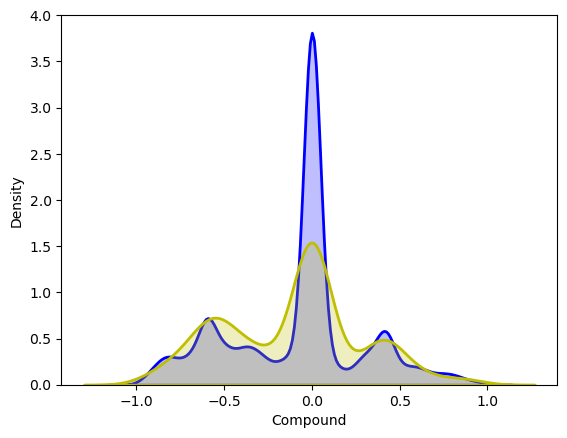

In [44]:
sns.distplot(df[~df["Location"].str.contains('Ukraine')]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'b', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})

sns.distplot(df[df['Location'].str.contains("Ukraine")]["Compound"], hist=False, kde=True, 
             bins=int(180/5), color = 'y', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'shade': True,'linewidth': 2})